In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('../dataset/dataset.csv')

In [3]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
data.isna().any().any()

False

In [6]:
print(data['Action'].unique())

['allow' 'drop' 'deny' 'reset-both']


In [7]:
data['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

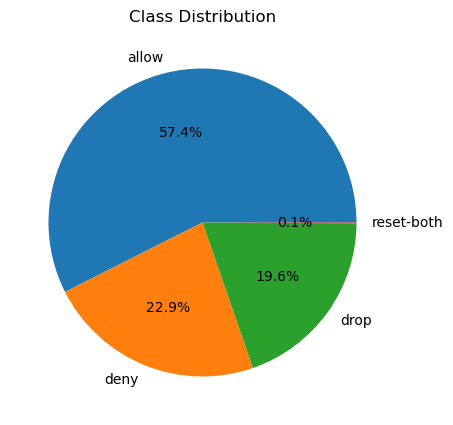

In [8]:
class_distribution = data['Action'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%')
plt.title("Class Distribution")

plt.show()

# Nejednaka raspodela klasa - bice potrebna stratifikacija
# Klasa reset-both ce biti nezgodna za klasifikaciju

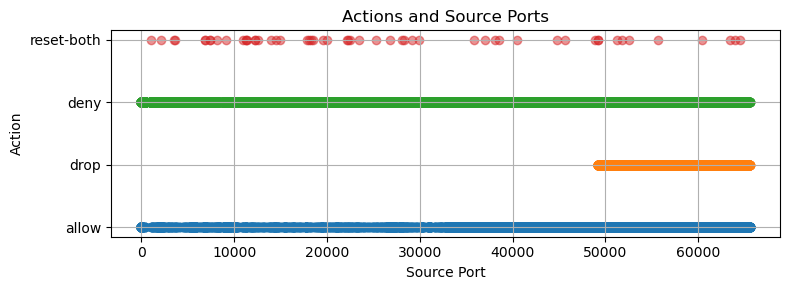

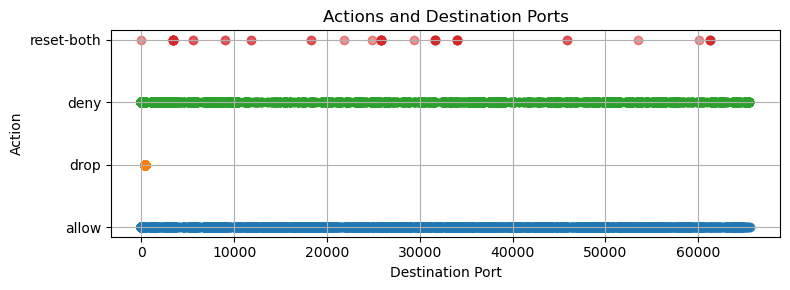

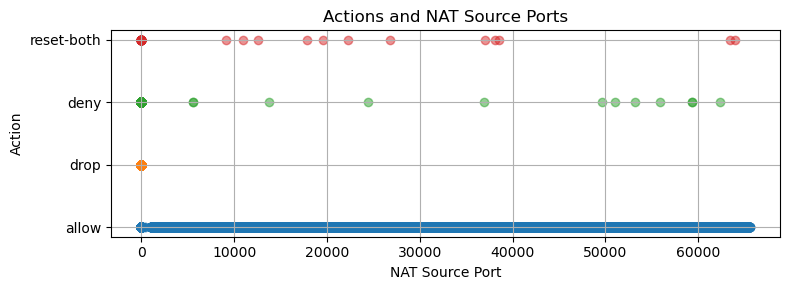

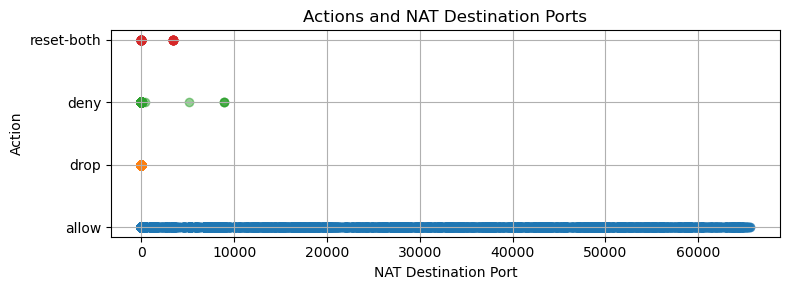

In [9]:
ports = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

for port in ports:
    plt.figure(figsize=(8, 3))
    for action in data['Action'].unique():
        subset = data[data['Action'] == action]
        plt.scatter(subset[port], subset['Action'], label=action, alpha=0.5)
    
    plt.xlabel(port)
    plt.ylabel("Action")
    plt.title(f"Actions and {port}s")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
print(data['Bytes'].corr(data['Bytes Sent'] + data['Bytes Received']))
print(data['Packets'].corr(data['pkts_sent'] + data['pkts_received']))

0.9999999999999999
1.0


In [11]:
# Atributi 'Bytes' i 'Packets' su skoro pa uvek zbir
# 'Sent' i 'Received' atributa, pa mogu da se uklone

data.drop(['Bytes', 'Packets'], axis=1, inplace=True)
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,94,83,30,1,1
1,56258,3389,56258,3389,allow,1600,3168,17,10,9
2,6881,50321,43265,50321,allow,118,120,1199,1,1
3,50553,3389,50553,3389,allow,1438,1889,17,8,7
4,50002,443,45848,443,allow,6778,18580,16,13,18


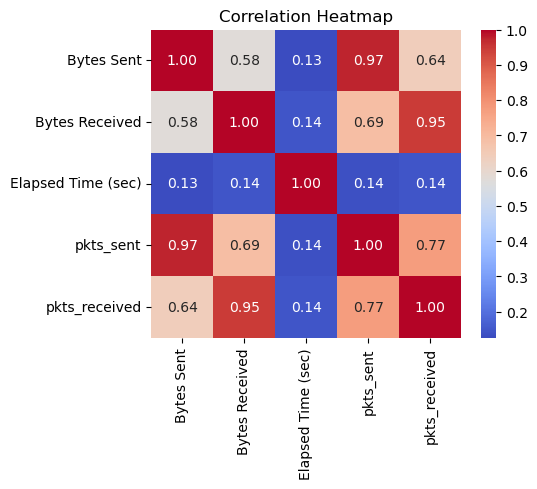

In [12]:
numerical_attributes = ['Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

correlation_matrix = data[numerical_attributes].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.show()

In [13]:
# Zbog velike korelacije izmedju Bytes Sent/Received i pkts_ sent/received
# atributa, mogu da se izbace pkts atributi

data.drop(['pkts_sent', 'pkts_received'], axis=1, inplace=True)
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,57222,53,54587,53,allow,94,83,30
1,56258,3389,56258,3389,allow,1600,3168,17
2,6881,50321,43265,50321,allow,118,120,1199
3,50553,3389,50553,3389,allow,1438,1889,17
4,50002,443,45848,443,allow,6778,18580,16


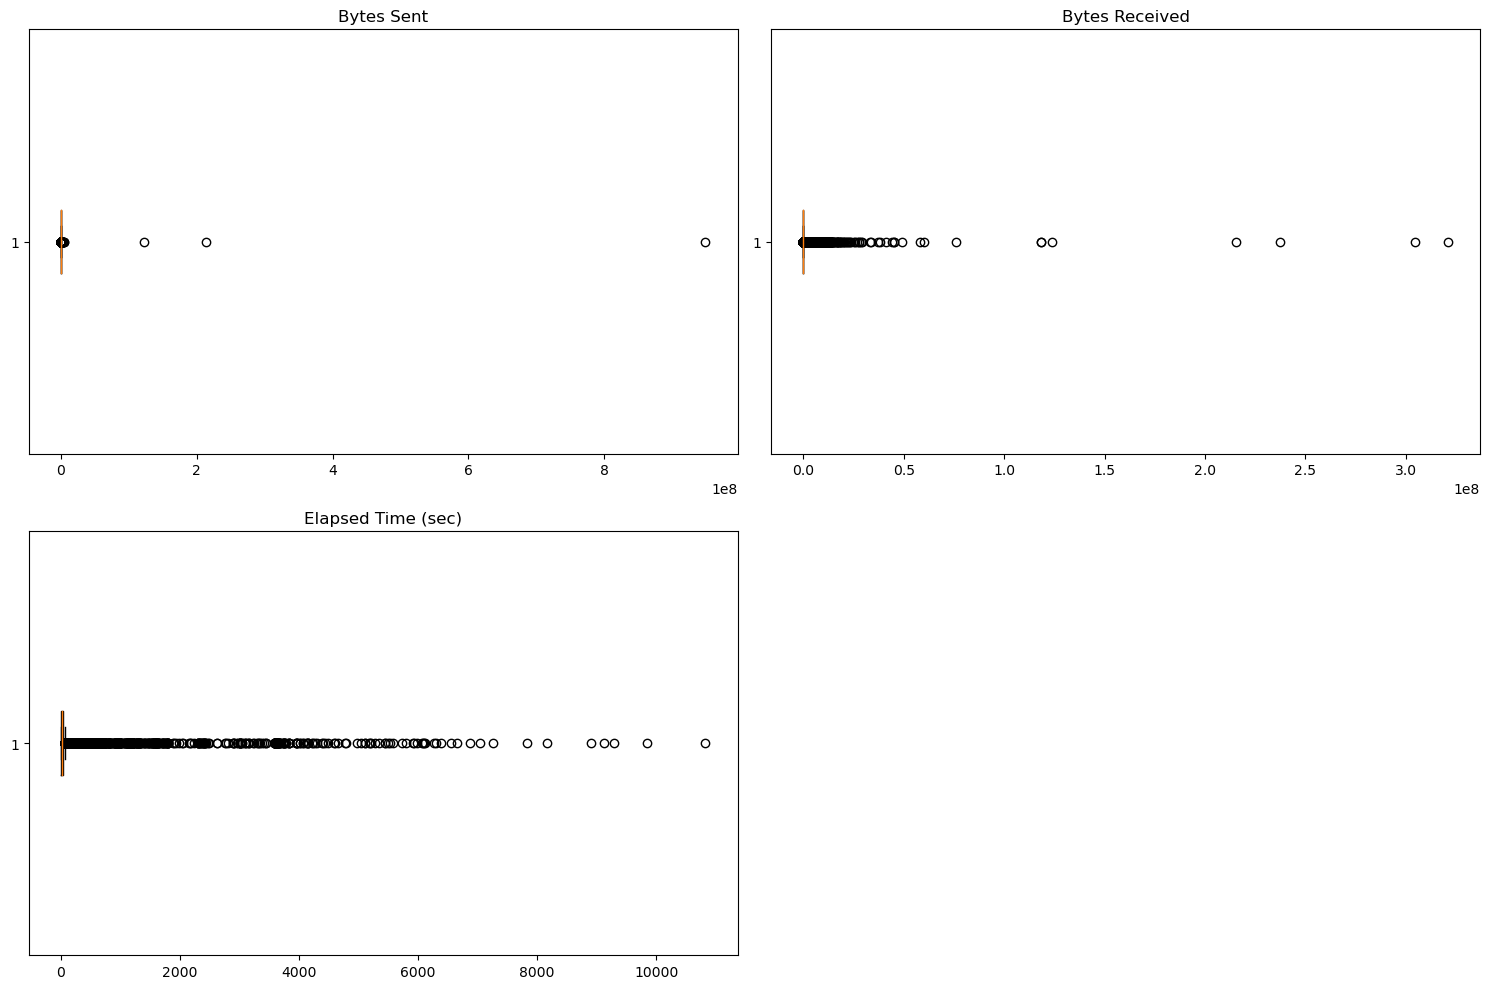

In [14]:
numerical_attributes = ['Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)']

num_attributes = len(numerical_attributes)
num_cols = 2
num_rows = (num_attributes + num_cols - 1) // num_cols

plt.figure(figsize=(15, 10))
for i, attr in enumerate(numerical_attributes, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.boxplot(data[attr], vert=False)
    plt.title(attr)

plt.tight_layout()
plt.show()

In [15]:
data.nlargest(10, 'Bytes Sent')

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Elapsed Time (sec)
10220,57235,15187,23276,15187,allow,948477220,320881795,9283
61429,15792,3478,30536,3478,allow,213443641,215492273,2242
33967,15503,62336,46736,62336,allow,122661116,4992391,2162
40689,59275,443,56019,443,allow,5306961,237428641,3604
57556,51779,3389,21341,3389,allow,4119315,58122902,4772
50,63842,45682,31353,45682,allow,3850148,837061,107
23851,63996,443,19057,443,allow,3727246,118565893,331
63595,50121,443,24047,443,allow,2750998,304353862,6122
47827,60211,443,55686,443,allow,2726981,123763533,553
24107,49522,443,58242,443,allow,2639957,91127,151


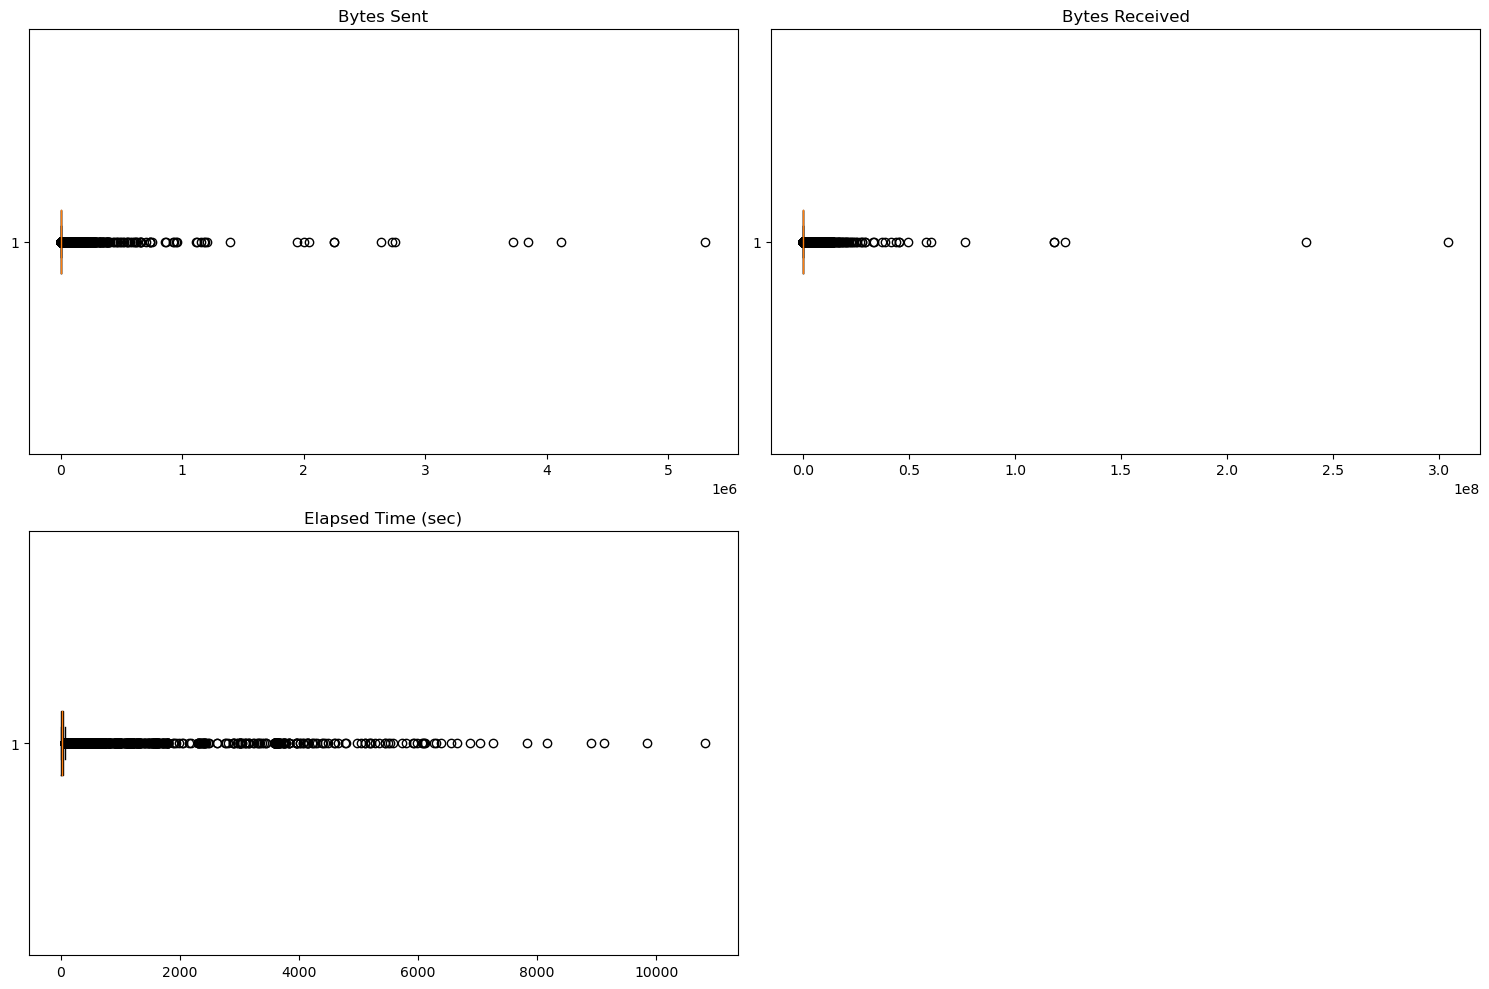

In [16]:
data = data[data['Bytes Sent'] < 100000000]

plt.figure(figsize=(15, 10))
for i, attr in enumerate(numerical_attributes, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.boxplot(data[attr], vert=False)
    plt.title(attr)

plt.tight_layout()
plt.show()

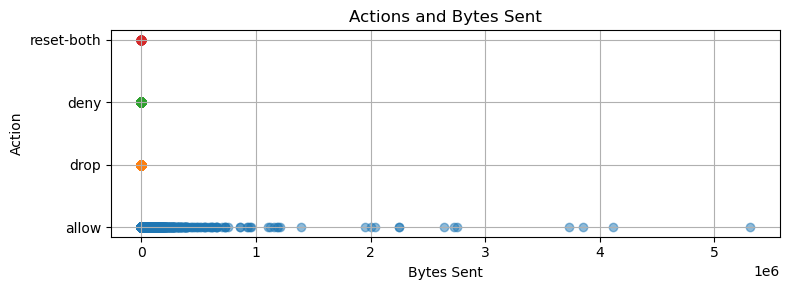

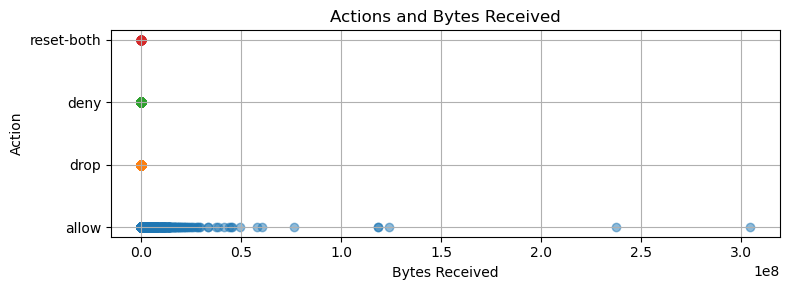

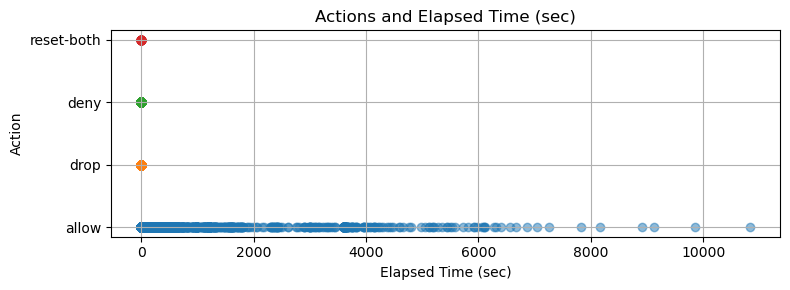

In [17]:
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 3))
    for action in data['Action'].unique():
        subset = data[data['Action'] == action]
        plt.scatter(subset[attribute], subset['Action'], label=action, alpha=0.5)
    
    plt.xlabel(attribute)
    plt.ylabel("Action")
    plt.title(f"Actions and {attribute}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
data.to_csv('../dataset/preprocessed.csv', index=False)

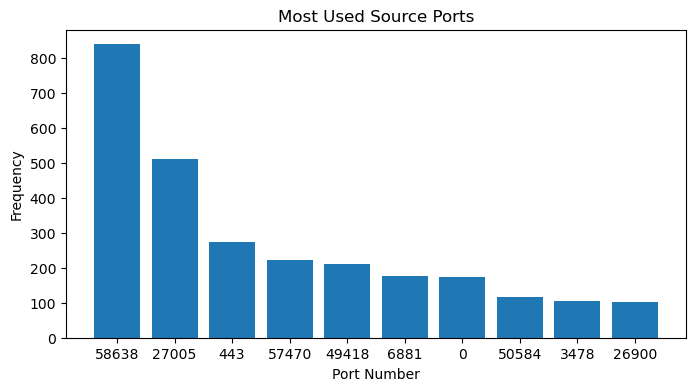

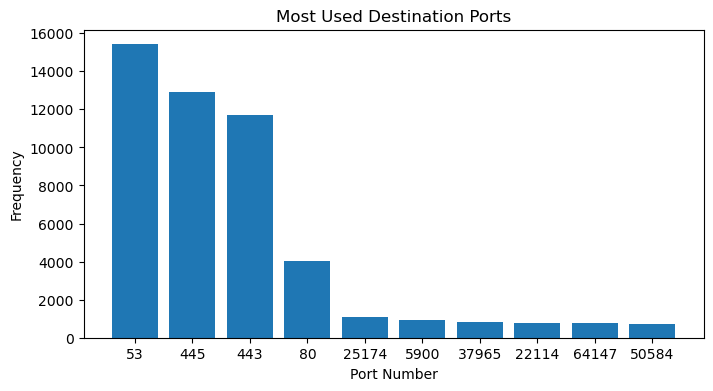

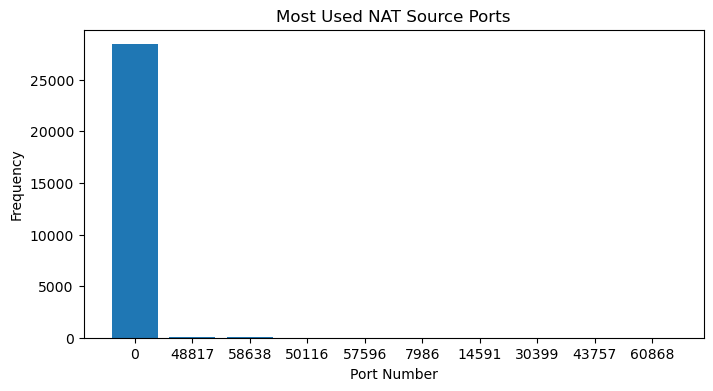

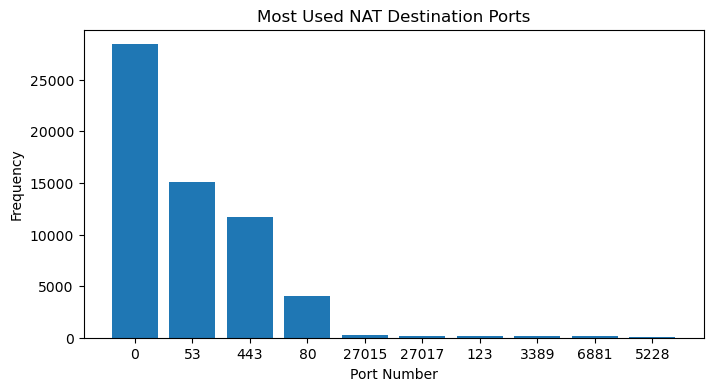

In [19]:
for port in ports:
    top10 = data[port].value_counts().nlargest(10)
    plt.figure(figsize=(8, 4))
    plt.bar(top10.index.astype(str), top10.values)
    plt.title(f'Most Used {port}s')
    plt.xlabel('Port Number')
    plt.ylabel('Frequency')
    plt.show()

In [20]:
for port in ports:
    print(f'\n{port}s')
    print(data[port].value_counts()/len(data[port]))


Source Ports
58638    0.012819
27005    0.007829
443      0.004166
57470    0.003388
49418    0.003205
           ...   
40956    0.000015
39926    0.000015
33906    0.000015
33938    0.000015
54871    0.000015
Name: Source Port, Length: 22723, dtype: float64

Destination Ports
53       0.235224
445      0.196722
443      0.178303
80       0.061576
25174    0.016588
           ...   
3363     0.000015
10016    0.000015
48608    0.000015
13384    0.000015
22455    0.000015
Name: Destination Port, Length: 3272, dtype: float64

NAT Source Ports
0        0.433884
48817    0.001267
58638    0.000778
50116    0.000229
57596    0.000076
           ...   
33661    0.000015
36797    0.000015
14122    0.000015
61018    0.000015
13485    0.000015
Name: NAT Source Port, Length: 29150, dtype: float64

NAT Destination Ports
0        0.433884
53       0.230341
443      0.178211
80       0.061469
27015    0.003571
           ...   
48608    0.000015
61471    0.000015
5333     0.000015
36989    0.0000

In [21]:
data.drop(['Source Port'], axis=1, inplace=True)

In [22]:
ports = ['Destination Port', 'NAT Source Port', 'NAT Destination Port']

for port in ports:
    top5 = data[port].value_counts().nlargest(5).index.tolist()
    data[port] = data[port].apply(lambda x: x if x in top5 else 'Other')

data.head()

,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,53,Other,53,allow,94,83,30
1,Other,Other,Other,allow,1600,3168,17
2,Other,Other,Other,allow,118,120,1199
3,Other,Other,Other,allow,1438,1889,17
4,443,Other,443,allow,6778,18580,16


In [23]:
data = pd.get_dummies(data, columns=['Destination Port', 'NAT Source Port', 'NAT Destination Port'], drop_first=True)
data.head()

,Action,Bytes Sent,Bytes Received,Elapsed Time (sec),Destination Port_80,Destination Port_443,Destination Port_445,Destination Port_25174,Destination Port_Other,NAT Source Port_48817,NAT Source Port_50116,NAT Source Port_57596,NAT Source Port_58638,NAT Source Port_Other,NAT Destination Port_53,NAT Destination Port_80,NAT Destination Port_443,NAT Destination Port_27015,NAT Destination Port_Other
0,allow,94,83,30,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,allow,1600,3168,17,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,allow,118,120,1199,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,allow,1438,1889,17,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,allow,6778,18580,16,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
data.to_csv('../dataset/preprocessed_cat.csv', index=False)